# [Nomad2018 Predicting Transparent Conductors](#https://www.kaggle.com/c/nomad2018-predict-transparent-conductors)
Predict the key properties of novel transparent semiconductors
***
The diffrent properties of **Aluminum,Gallium,Indium** is given in data set. In order to reduce electric transmission loss,discovery of new **transparent conductor** alloy is important. The transparent conductor having characteristic **good conductivity** and have a **low absorption**. 

The aim is to prediction of two target properties: the formation energy (which is an indication of the stability of a new material) and the bandgap energy (which is an indication of the potential for transparency over the visible range) to facilitate the discovery of new transparent conductors
***

## Import library

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline
seed=2300

## Read data set

In [97]:
path = 'file/'
#path = '../input/'
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
print('Number of rows and columns in train data set:',train.shape)
print('Number of rows and columns in test data  set:',test.shape)

Number of rows and columns in train data set: (2400, 14)
Number of rows and columns in test data  set: (600, 12)


### Evaluvation metric

In [88]:
def rmsle(y_true,y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

## Explore data set

In [98]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [99]:
train.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


## Dependant variable distribution

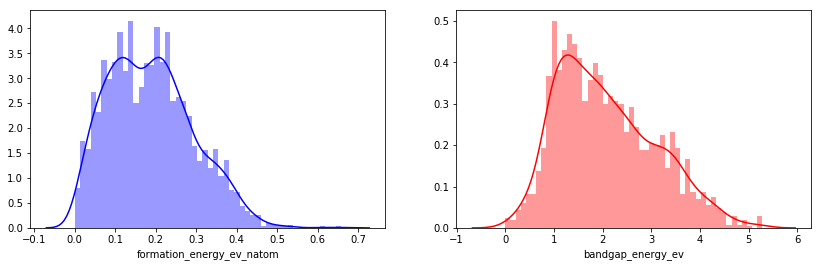

In [113]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
ax1,ax2 = ax.flatten()
sns.distplot(train['formation_energy_ev_natom'],bins=50,ax=ax1,color='b')
sns.distplot(train['bandgap_energy_ev'],bins=50,ax=ax2,color='r')

Distribution of data is not normal, both are right skewed 

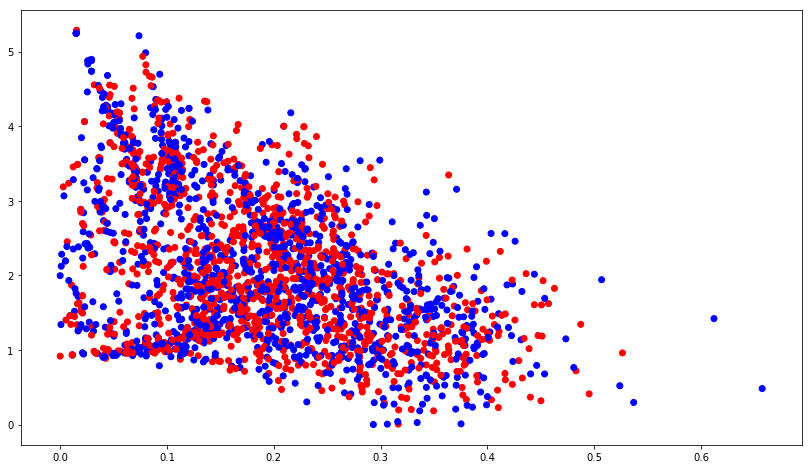

In [52]:
plt.figure(figsize=(14,8))
plt.scatter(train['formation_energy_ev_natom'],train['bandgap_energy_ev'],color=['r','b'])

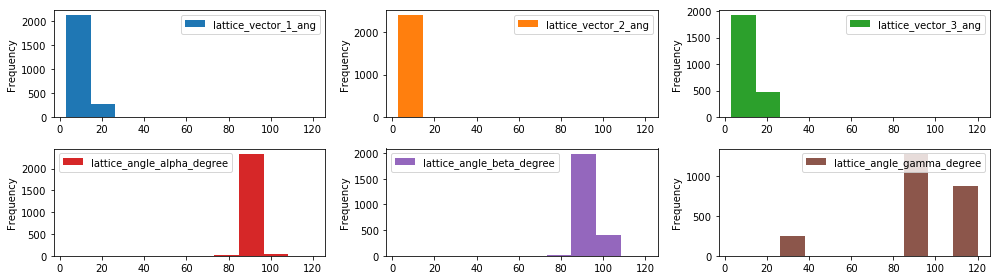

In [119]:
# Lattice angle
f,ax = plt.subplots(2,3,figsize=(14,4))
feat = train.columns[train.columns.str.startswith('lattice')]
train[feat].plot(kind='hist',subplots=True,figsize=(6,6),ax=ax)
plt.tight_layout()

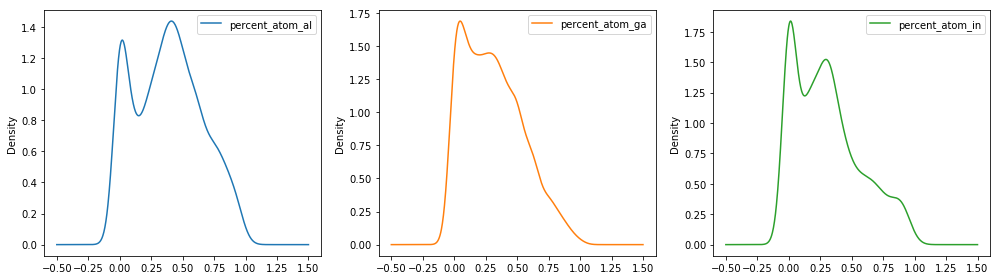

In [120]:
# Lattice angle
f,ax = plt.subplots(1,3,figsize=(14,4))
feat = train.columns[train.columns.str.startswith('percent')]
train[feat].plot(kind='kde',subplots=True,figsize=(6,6),ax=ax)
plt.tight_layout()

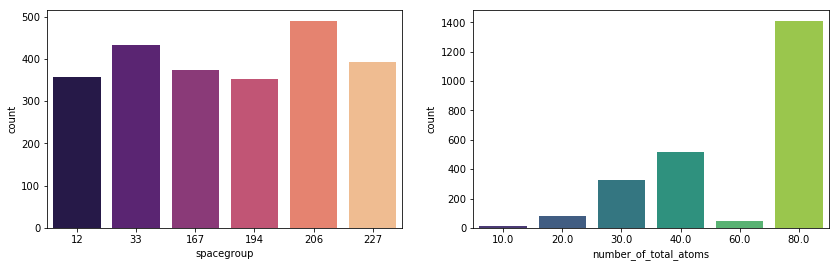

In [114]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
sns.countplot(train['spacegroup'], palette = 'magma', ax = ax1)
sns.countplot(x = train['number_of_total_atoms'], palette = 'viridis', ax = ax2)

In [56]:
pd.crosstab(train['number_of_total_atoms'],train['spacegroup'])

spacegroup,12,33,167,194,206,227
number_of_total_atoms,,,,,,
10.0,0,0,0,13,0,0
20.0,84,0,0,0,0,0
30.0,0,0,326,0,0,0
40.0,0,126,0,0,0,393
60.0,0,0,48,0,0,0
80.0,274,306,0,340,490,0


## Co relation plot

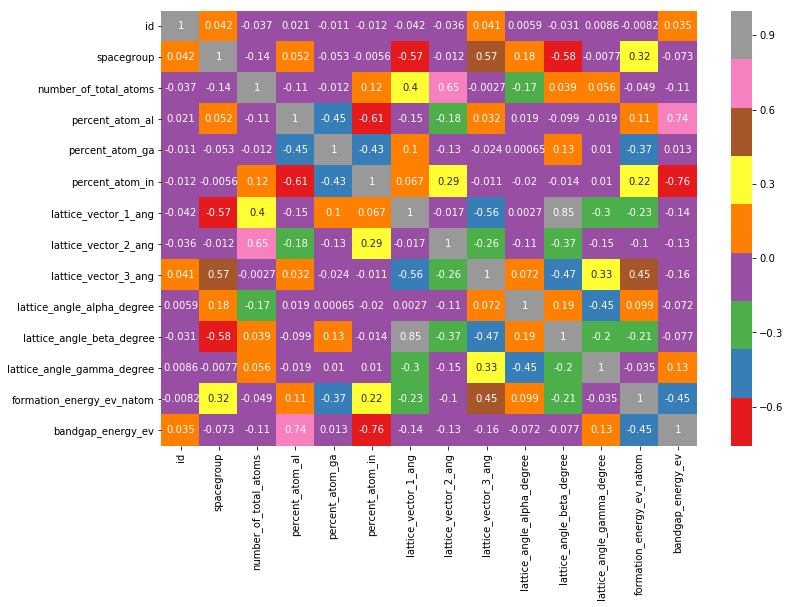

In [54]:
cor = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,cmap='Set1',annot=True)

In [57]:
# Degree to radian
train['alpha_rad'] = np.radians(train['lattice_angle_alpha_degree'])
train['beta_rad'] = np.radians(train['lattice_angle_beta_degree'])
train['gamma_rad'] = np.radians(train['lattice_angle_gamma_degree'])

test['alpha_rad'] = np.radians(test['lattice_angle_alpha_degree'])
test['beta_rad'] = np.radians(test['lattice_angle_beta_degree'])
test['gamma_rad'] = np.radians(test['lattice_angle_gamma_degree'])

## Volumn
[Soure](#https://www.kaggle.com/cbartel/random-forest-using-elemental-properties/notebook)

In [58]:
def vol(df):
    """
    Args:
        a (float) - lattice vector 1
        b (float) - lattice vector 2
        c (float) - lattice vector 3
        alpha (float) - lattice angle 1 [radians]
        beta (float) - lattice angle 2 [radians]
        gamma (float) - lattice angle 3 [radians]
    Returns:
        volume (float) of the parallelepiped unit cell
    """
    volumn = df['lattice_vector_1_ang']*df['lattice_vector_2_ang']*df['lattice_vector_3_ang']*np.sqrt(
    1 + 2*np.cos(df['alpha_rad'])*np.cos(df['beta_rad'])*np.cos(df['gamma_rad'])
    -np.cos(df['alpha_rad'])**2
    -np.cos(df['beta_rad'])**2
    -np.cos(df['gamma_rad'])**2)
    df['volumn'] = volumn

In [59]:
vol(train)
vol(test)

In [60]:
# Atomic density
train['density'] = train['number_of_total_atoms'] / train['volumn']
test['density'] = test['number_of_total_atoms'] / test['volumn']

## Mean & Median range

In [61]:
def mean_median_feature(df):
        print('# Mean & Median range')
        dmean = df.mean()
        dmedian = df.median()
        #q0_1 = df.quantile(0.1)
        #q0_99 = df.quantile(0.99)
        q1 = df.quantile(0.25)
        d2 = df.quantile(0.5)
        q3 = df.quantile(0.75)
        col = df.columns
        del_col = ['id','formation_energy_ev_natom','bandgap_energy_ev']
        col = [w for w in col if w not in del_col]
        
        for c in col:
            df['mean_'+c] = (df[c] > dmean[c]).astype(np.uint8)
            df['median_'+c] = (df[c] > dmedian[c]).astype(np.uint8)
            #df['q0_1_'+c] = (df[c] < q0_1[c]).astype(np.uint8)
            #df['q0_99_'+c] = (df[c] > q0_99[c]).astype(np.uint8)
            df['q1_'+c] = (df[c] < q1[c]).astype(np.uint8)
            df['q2_'+c] = (df[c] < q1[c]).astype(np.uint8)
            df['q3_'+c] = (df[c] > q3[c]).astype(np.uint8)
            
        print('Shape',df.shape)


mean_median_feature(train)
mean_median_feature(test) 

# Mean & Median range
Shape (2400, 99)
# Mean & Median range
Shape (600, 97)


### One Hot encoding

In [62]:
def OHE(df1,df2,columns):
    len = df1.shape[0]
    df = pd.concat([df1,df2],axis=0)
    c2,c3 = [], {}
    print('Categorical variables',columns)
    for c in columns:
        c2.append(c)
        c3[c] = 'ohe_'+c
        
    df = pd.get_dummies(data = df, columns = c2, prefix = c3)
    df1 = df.iloc[:len,:]
    df2 = df.iloc[len:,:]
    print('Data size',df1.shape,df2.shape)
    return df1,df2

In [63]:
col = ['spacegroup','number_of_total_atoms']
train1,test1 = OHE(train,test,col)

Categorical variables ['spacegroup', 'number_of_total_atoms']
Data size (2400, 109) (600, 109)


##  Feature selection 


In [64]:
col = ['formation_energy_ev_natom','bandgap_energy_ev']
X = train1.drop(['id']+col,axis=1)
y = train1[col]
x_test = test1.drop(['id']+col,axis=1)

selector = VarianceThreshold(threshold=.0001)
selector.fit(X) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = X.columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))
selected_feat = X.columns.drop(v)

#update 
X = X[selected_feat]
x_test = x_test[selected_feat]

3 variables have too low variance.
These variables are ['density', 'median_number_of_total_atoms', 'q3_number_of_total_atoms']


## Model


In [76]:
kf = KFold(n_splits=5,random_state=seed,shuffle=True)
cv_score =[]
pred_test_full_1 = np.zeros((x_test.shape[0],kf.n_splits))
pred_test_full_2 = np.zeros((x_test.shape[0],kf.n_splits))
lr = LinearRegression()

for i, (train_index, valid_index) in enumerate(kf.split(X)):
    print('{} of Kfold {}'.format(i+1,kf.n_splits))
    xtrain, xvalid = X.loc[train_index], X.loc[valid_index]
    ytrain, yvalid = y.loc[train_index], y.loc[valid_index]
    
    ##Building model for ',col[0]
    lr.fit(xtrain,ytrain[col[0]])
    pred_test_full_1[:,i] = lr.predict(x_test)
    y_pred = lr.predict(xvalid)
    score = rmsle(yvalid[col[0]],y_pred)
    cv_score.append(score)
    print('R square for {} is {''} :'.format(col[0],score))
    
    ##Building model for ',col[1]
    lr.fit(xtrain,ytrain[col[1]])
    pred_test_full_2[:,i] = lr.predict(x_test)
    y_pred = lr.predict(xvalid)
    score = rmsle(yvalid[col[1]],y_pred)
    print('R square for {} is {}:'.format(col[1],score))
    cv_score.append(score)

1 of Kfold 5
R square for formation_energy_ev_natom is 0.03727017477059234 :
R square for bandgap_energy_ev is 0.11063981221981403:
2 of Kfold 5
R square for formation_energy_ev_natom is 0.042437479893719904 :
R square for bandgap_energy_ev is 0.09713544342803337:
3 of Kfold 5
R square for formation_energy_ev_natom is 0.03945318306866106 :
R square for bandgap_energy_ev is 0.10294746683551446:
4 of Kfold 5
R square for formation_energy_ev_natom is 0.04266027466336832 :
R square for bandgap_energy_ev is 0.08676656404052438:
5 of Kfold 5
R square for formation_energy_ev_natom is 0.0398555550729351 :
R square for bandgap_energy_ev is 0.7505847837794536:


/home/sudhir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
print(cv_score)
np.mean(cv_score)

[0.03727017477059234, 0.11063981221981403, 0.042437479893719904, 0.09713544342803337, 0.03945318306866106, 0.10294746683551446, 0.04266027466336832, 0.08676656404052438, 0.0398555550729351, 0.7505847837794536]


0.13497507377726164

## Submit prediction

In [67]:
y_pred = np.zeros((x_test.shape[0],len(col)))
y_pred[:,0],y_pred[:,1] = pred_test_full_1.mean(axis=1), pred_test_full_2.mean(axis=1)
y_pred[y_pred <= 0] = 1e-5

submit = pd.DataFrame({'id':test['id'],'formation_energy_ev_natom':y_pred[:,0],'bandgap_energy_ev':y_pred[:,1]})
submit.to_csv('lr_conductor.csv',index=False)

In [81]:
submit.head()

,bandgap_energy_ev,formation_energy_ev_natom,id
0,1.471412,0.206687,1
1,3.828277,0.084650,2
2,3.456024,0.148454,3
3,3.089470,0.033790,4
4,1.524623,0.135087,5


### Thank you for visiting